# What drives popularity in music on Spotify? 

In [1]:
# Importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

# Reading in spotify data as a data frame
file = "Resources/SpotifyFeatures.csv"
spotify_data = pd.read_csv(file)

# Formatting parameters
plt.style.use('dark_background')
# Getting rid of warning message from output
pd.options.mode.chained_assignment = None 


We decided to utilise a pre-existing data set rather than using the spotify API itself. The data is made up from 26 genres with around 10,000 tracks per genre, for a total of 232,725 tracks, giving us a balanced sample set <sup>(1)</sup>. Spotify does not give the details of it's popularity calculations online but it is not a user assigned rating, rather it seems to be based on such factors as how often/what rank it appears on charts and the amount of times it's been streamed/played <sup>(2)</sup>. Explanations for what each category represents was taken from the spotify API website <sup>(3)</sup>.

In [2]:
# Renaming and cleaning up all columns in the data frame
spotify_data.columns = ['Genre', 'Artist Name', 'Track Name', 'Track ID', 'Popularity', 'Acousticness', 
                        'Danceability', "Duration", 'Energy', 'Instrumentalness', 'Key', 'Liveness', 
                        'Loudness', 'Mode', 'Speechiness', 'Tempo', 'Time Signature', 'Valence']

In [3]:
# Removing duplicate versions of tracks, except keeping the first
clean_dupes = spotify_data.drop_duplicates(subset=["Track ID"],keep="first")
clean_dupes

,Genre,Artist Name,Track Name,Track ID,Popularity,Acousticness,Danceability,Duration,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.6110,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.2460,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.9520,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.7030,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.9500,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232716,Soul,John Legend,Quickly (feat. Brandy),1U0OMWvR89Cm20vCNar50f,39,0.2310,0.736,222667,0.701,0.000000,A#,0.2030,-4.345,Minor,0.1000,99.991,4/4,0.770
232717,Soul,Belly,P.O.P.,2gGqKJWfWbToha2YmDxnnj,43,0.1040,0.802,201173,0.516,0.000485,D,0.1050,-9.014,Major,0.2130,175.666,4/4,0.482
232719,Soul,"Bobby ""Blue"" Bland",I'll Take Care Of You - Single Version,2iZf3EUedz9MPqbAvXdpdA,32,0.5660,0.423,144667,0.337,0.000000,A#,0.2760,-13.092,Minor,0.0436,80.023,4/4,0.497
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.0329,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969


In [4]:
# Removing unused columns
del clean_dupes['Duration']
del clean_dupes['Key']
del clean_dupes['Liveness']
del clean_dupes['Tempo']
del clean_dupes['Time Signature']
del clean_dupes['Mode']
clean_dupes

,Genre,Artist Name,Track Name,Track ID,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Loudness,Speechiness,Valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.6110,0.389,0.910,0.000000,-1.828,0.0525,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.2460,0.590,0.737,0.000000,-5.559,0.0868,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.9520,0.663,0.131,0.000000,-13.879,0.0362,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.7030,0.240,0.326,0.000000,-12.178,0.0395,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.9500,0.331,0.225,0.123000,-21.150,0.0456,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...
232716,Soul,John Legend,Quickly (feat. Brandy),1U0OMWvR89Cm20vCNar50f,39,0.2310,0.736,0.701,0.000000,-4.345,0.1000,0.770
232717,Soul,Belly,P.O.P.,2gGqKJWfWbToha2YmDxnnj,43,0.1040,0.802,0.516,0.000485,-9.014,0.2130,0.482
232719,Soul,"Bobby ""Blue"" Bland",I'll Take Care Of You - Single Version,2iZf3EUedz9MPqbAvXdpdA,32,0.5660,0.423,0.337,0.000000,-13.092,0.0436,0.497
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.0329,0.785,0.683,0.000880,-6.944,0.0337,0.969


In [5]:
# Removing all comedy and then movies from our data, as these have a unrepresentatively high level of 'speechiness'
rem_comedy = clean_dupes.loc[clean_dupes["Genre"] != "Comedy"]
rem_movies = rem_comedy.loc[rem_comedy["Genre"] != "Movie"]
clean_spotify_data = rem_movies
clean_spotify_data

,Genre,Artist Name,Track Name,Track ID,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Loudness,Speechiness,Valence
135,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.0830,0.724,0.689,0.000000,-5.922,0.1350,0.6930
136,R&B,Rihanna,Desperado,6KFaHC9G178beAp7P0Vi5S,63,0.3230,0.685,0.610,0.000000,-5.221,0.0439,0.3230
137,R&B,Yung Bleu,Ice On My Baby (feat. Kevin Gates) - Remix,6muW8cSjJ3rusKJ0vH5olw,62,0.0675,0.762,0.520,0.000004,-5.237,0.0959,0.0862
138,R&B,Surfaces,Heaven Falls / Fall on Me,7yHqOZfsXYlicyoMt62yC6,61,0.3600,0.563,0.366,0.002430,-6.896,0.1210,0.7680
139,R&B,Olivia O'Brien,Love Myself,4XzgjxGKqULifVf7mnDIQK,68,0.5960,0.653,0.621,0.000000,-5.721,0.0409,0.4660
...,...,...,...,...,...,...,...,...,...,...,...,...
232716,Soul,John Legend,Quickly (feat. Brandy),1U0OMWvR89Cm20vCNar50f,39,0.2310,0.736,0.701,0.000000,-4.345,0.1000,0.7700
232717,Soul,Belly,P.O.P.,2gGqKJWfWbToha2YmDxnnj,43,0.1040,0.802,0.516,0.000485,-9.014,0.2130,0.4820
232719,Soul,"Bobby ""Blue"" Bland",I'll Take Care Of You - Single Version,2iZf3EUedz9MPqbAvXdpdA,32,0.5660,0.423,0.337,0.000000,-13.092,0.0436,0.4970
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.0329,0.785,0.683,0.000880,-6.944,0.0337,0.9690


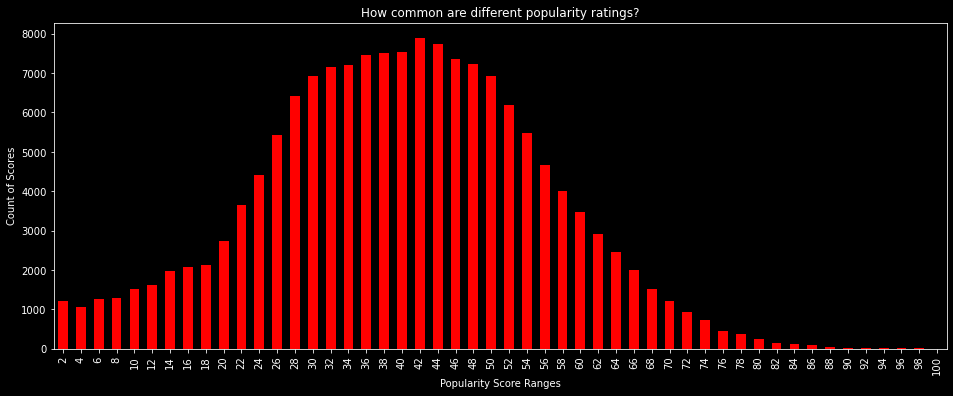

In [6]:
# The variable 'pop' will be used throughout
pop = clean_spotify_data["Popularity"]
bins = np.arange(0, 101, 2)
count_labels = []

for x in bins: 
    str((x))
    count_labels.append(x)
del count_labels[0]

clean_spotify_data["Popularity Count"] = pd.cut(clean_spotify_data["Popularity"], bins, labels=count_labels) 
pop_chart_group = clean_spotify_data.groupby("Popularity Count")
pop_count_uni = pop_chart_group["Track ID"].nunique()
pop_count_uni.plot(kind="bar", color='red', align="center", width=0.55, figsize = (16,6))

plt.title("How common are different popularity ratings?")
plt.xlabel("Popularity Score Ranges")
plt.ylabel("Count of Scores")
plt.savefig("graphs\%1.pop_count.png")
plt.show()

This bar chart breaks up the popularity scores that tracks received into small groups to show how many fell into which popularity rating brackets. 

y = 20.94x + 27.01, coefficient = 0.25


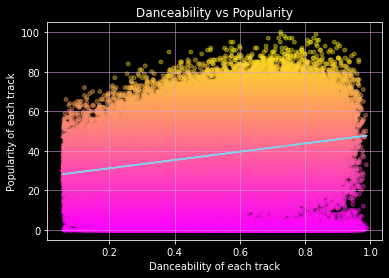

In [7]:
danceability = clean_spotify_data["Danceability"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(danceability, pop)
regress_values_danceability = danceability * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(danceability, pop, alpha=0.4, s=15, c=pop, cmap="spring")
plt.plot(danceability, regress_values_danceability, c="skyblue")
plt.title("Danceability vs Popularity")
plt.xlabel("Danceability of each track")
plt.ylabel("Popularity of each track")
plt.grid(alpha=0.7, c="plum")
plt.savefig("graphs\%2.pop_dance.png")

correlation = st.pearsonr(danceability, pop)
plt.show
print(f"{line_eq}, coefficient = {round(correlation[0],2)}")

These first 4 charts are plotting the relationship between popularity and an assumed correlate, in this case 'Danceability'. "Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity." This turns out in practice to be a suprisingly fairly weak correlation of .25.

y = 14.76x + 30.11, coefficient = 0.25


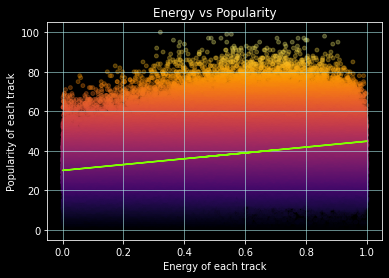

In [8]:
energy = clean_spotify_data["Energy"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(energy, pop)
regress_values_energy = energy * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(energy, pop, alpha=0.3, s=15, c=pop, cmap="inferno")
plt.plot(energy, regress_values_energy, c="chartreuse")
plt.title("Energy vs Popularity")
plt.xlabel("Energy of each track")
plt.ylabel("Popularity of each track")
plt.grid(alpha=0.7, c="paleturquoise")
plt.savefig("graphs\%3.pop_energy.png")

correlation = st.pearsonr(energy, pop)
plt.show
print(f"{line_eq}, coefficient = {round(correlation[0],2)}")

Continuing with our intuitive presumptions, we here chart a tracks popularity with it's 'Energy', here defined as representing ".... a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy." Suprisingly, we end up yet again with a fairly weak correlation of .25.

y = 3.55x + 36.75, coefficient = 0.06


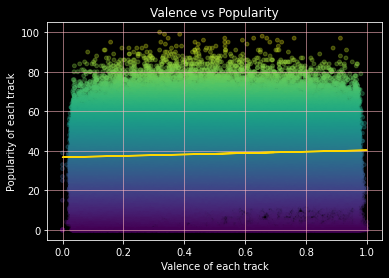

In [9]:
valence = clean_spotify_data["Valence"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(valence, pop)
regress_values_valence = valence * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(valence, pop, alpha=0.3, s=15, c=pop, cmap="viridis")
plt.plot(valence, regress_values_valence, c="gold")
plt.title("Valence vs Popularity")
plt.xlabel("Valence of each track")
plt.ylabel("Popularity of each track")
plt.grid(alpha=0.7, c="lightpink")
plt.savefig("graphs\%4.pop_valence.png")

correlation = st.pearsonr(valence, pop)
plt.show
print(f"{line_eq}, coefficient = {round(correlation[0],2)}")

Another common intution for the majority would be that popular music has a high valence. 'Valence' here means "....the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)." The relationship plotted here between popularity and valence resulting in such a meager correlation of .06 seems quite astonishing too. Perhaps when one recognises the broad scope of emotions and dispositions music encourages and plays with, these results make more sense, as music deals with a great range of human experience, not merely the positive.

y = 0.82x + 46.44, coefficient = 0.32


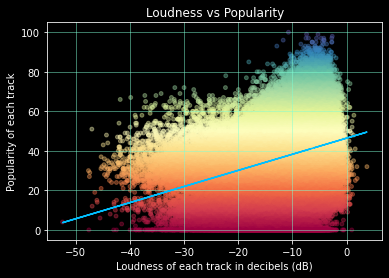

In [10]:
loudness = clean_spotify_data["Loudness"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(loudness, pop)
regress_values_loudness = loudness * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(loudness, pop, alpha=0.4, s=15, c=pop, cmap="Spectral")
plt.plot(loudness, regress_values_loudness, c="deepskyblue")
plt.title("Loudness vs Popularity")
plt.xlabel("Loudness of each track in decibels (dB)")
plt.ylabel("Popularity of each track")
plt.grid(alpha=0.6, c="aquamarine")
plt.savefig("graphs\%5.pop_loud.png")

correlation = st.pearsonr(loudness, pop)
plt.show
print(f"{line_eq}, coefficient = {round(correlation[0],2)}")

A fourth intutive assumption would be that the loudness of music is highly correlated with it's popularity. Here at a value of .32 is the strongest result thus far. 

y = 13.35x + 37.24, coefficient = 0.07


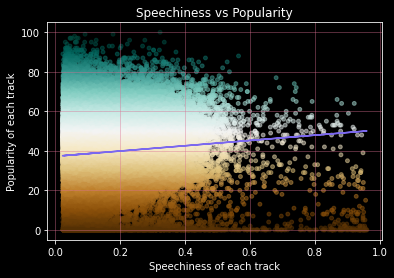

In [11]:
speechiness = clean_spotify_data["Speechiness"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(speechiness, pop)
regress_values_speechiness = speechiness * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(speechiness, pop, alpha=0.5, s=15, c=pop, cmap="BrBG")
plt.plot(speechiness, regress_values_speechiness, c="mediumslateblue")
plt.title("Speechiness vs Popularity")
plt.xlabel("Speechiness of each track")
plt.ylabel("Popularity of each track")
plt.grid(alpha=0.5, c="palevioletred")
plt.savefig("graphs\%6.pop_speech.png")

correlation = st.pearsonr(speechiness, pop)
plt.show
print(f"{line_eq}, coefficient = {round(correlation[0],2)}")

y = -10.71x + 40.34, coefficient = -0.21


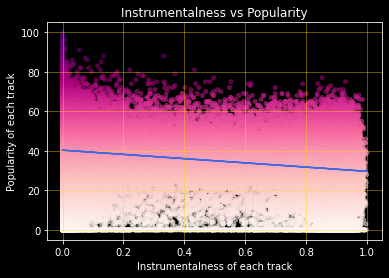

In [12]:
instrumentalness = clean_spotify_data["Instrumentalness"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(instrumentalness, pop)
regress_values_instrumentalness = instrumentalness * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(instrumentalness, pop, alpha=0.5, s=15, c=pop, cmap="RdPu")
plt.plot(instrumentalness, regress_values_instrumentalness, c="royalblue")
plt.title("Instrumentalness vs Popularity")
plt.xlabel("Instrumentalness of each track")
plt.ylabel("Popularity of each track")
plt.grid(alpha=0.5, c="gold")
plt.savefig("graphs\%7.pop_instru.png")

correlation = st.pearsonr(instrumentalness, pop)
plt.show
print(f"{line_eq}, coefficient = {round(correlation[0],2)}")

Having considered the prime candidates for popularity and considered them generally lacking, we now look at some other data for some more hints. The pair of graphs showing 'Speechiness' and 'Instrumentalness' shown above do not grant us much insight into popularity either. Speechiness is the frequency of spoken words and Instumentalness, their absence. A correlation of .07 for the former and -.21 for the former show they are not prime considerations in popularity.

y = -0.27x + 0.55, coefficient = -0.36


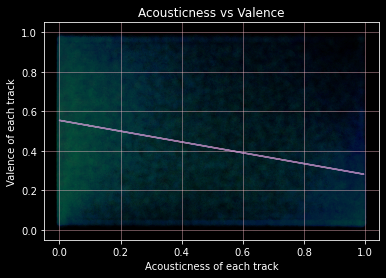

In [13]:
acousticness = clean_spotify_data["Acousticness"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(acousticness, valence)
regress_values_acoustic_valence = acousticness * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(acousticness, valence, alpha=0.01, s=30, c=pop, cmap="viridis")
plt.plot(acousticness, regress_values_acoustic_valence, alpha=0.7, c="plum")
plt.title("Acousticness vs Valence")
plt.xlabel("Acousticness of each track")
plt.ylabel("Valence of each track")
plt.grid(alpha=0.5, c="pink")
plt.savefig("graphs\%8.pop_acoust.png")

correlation = st.pearsonr(acousticness, valence)
plt.show
print(f"{line_eq}, coefficient = {round(correlation[0],2)}")

Depicting the confidence level that a track is acoustic plotted against valence gives us a correlation of -.36. This shows that the acoustic tracks tend highly towards being giving off a sombre and low valence feel.

y = 0.47x + 0.19, coefficient = 0.49


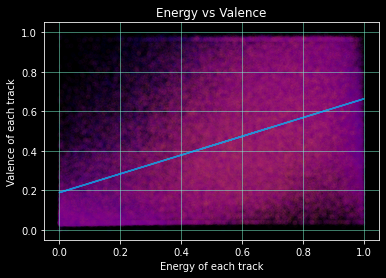

In [14]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(energy, valence)
regress_values_energy_valence = energy * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(energy, valence, alpha=0.03, s=15, c=pop, cmap="plasma")
plt.plot(energy, regress_values_energy_valence, alpha=0.7, c="deepskyblue")
plt.title("Energy vs Valence")
plt.xlabel("Energy of each track")
plt.ylabel("Valence of each track")
plt.grid(alpha=0.6, c="aquamarine")
plt.savefig("graphs\%9.energy_valence.png")

correlation = st.pearsonr(energy, valence)
plt.show
print(f"{line_eq}, coefficient = {round(correlation[0],2)}")

Although our initial intuitions concerning such things as energy and high valence being explanations for popularity where not correct, they had a grain of truth to them. Here, when plotting the energy of a track with it's valence, we can see that there is indeed a quite solid correlation between the two, that of .49. So, we are right that the high energy of a track does tend to make use feel positive emotions. Yet our vision of the breadth of music was limited.

## Our summary observations

* Danceability, energy, loudness and valence have shown less correlation than popular intuition would have assumed.

* Another common intuition for the majority would be that popular music has a high valence. The relationship plotted between popularity and valence resulting in such a meager correlation of .06 seems quite astonishing too.

* Popular assumption has been around a high correlation between energy and valence. Whilst our analysis has shown one of the strongest correlations from our results, popularity in music derives from more emotions, not merely the positive.

References
1) https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db?select=SpotifyFeatures.csv 
2) https://johncambefort.github.io/spotify_popularity/
3) https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features
